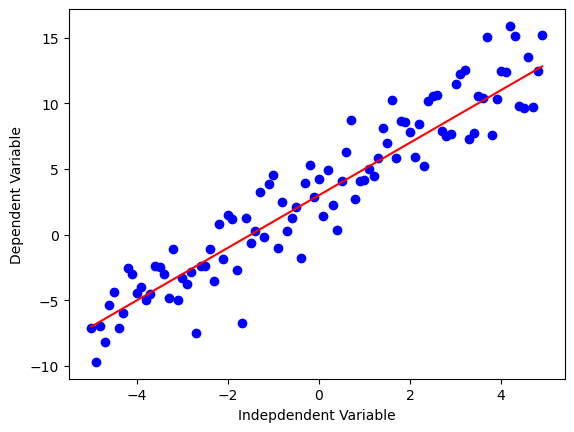

In [1]:
#***Fitting of non linear regression model

# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load in 

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

%matplotlib inline

# Input data files are available in the "../input/" directory.

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

#A quick look into different models

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = 2*(x) + 3

y_noise = 2 * np.random.normal(size=x.size)

ydata = y + y_noise

#plt.figure(figsize=(8,6))

plt.plot(x, ydata,  'bo')

plt.plot(x,y, 'r') 

plt.ylabel('Dependent Variable')

plt.xlabel('Indepdendent Variable')

plt.show()

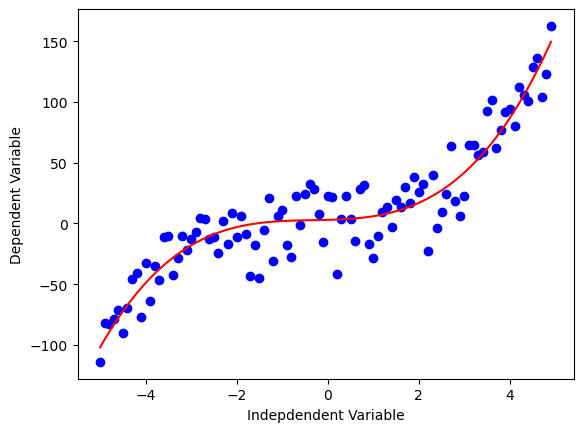

In [2]:

#cubic model

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = 1*(x**3) + 1*(x**2) + 1*x + 3

y_noise = 20 * np.random.normal(size=x.size)

ydata = y + y_noise

plt.plot(x, ydata,  'bo')

plt.plot(x,y, 'r') 

plt.ylabel('Dependent Variable')

plt.xlabel('Indepdendent Variable')

plt.show()

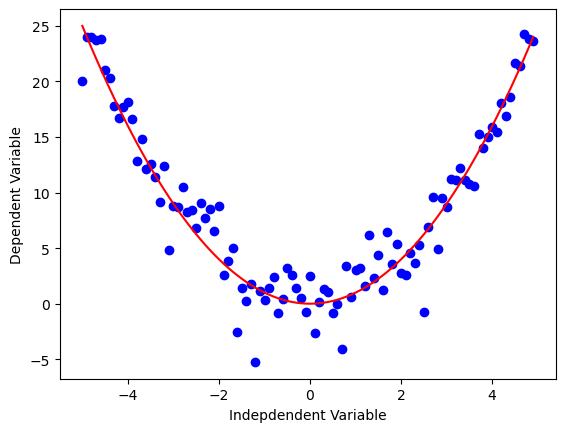

In [3]:
#quadratic model

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)

y_noise = 2 * np.random.normal(size=x.size)

ydata = y + y_noise

plt.plot(x, ydata,  'bo')

plt.plot(x,y, 'r') 

plt.ylabel('Dependent Variable')

plt.xlabel('Indepdendent Variable')

plt.show()

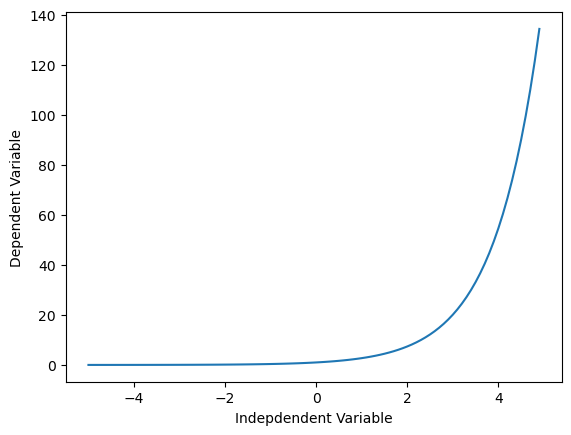

C:\Users\23MDT0047\AppData\Local\Temp\ipykernel_13996\4231557589.py:21: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


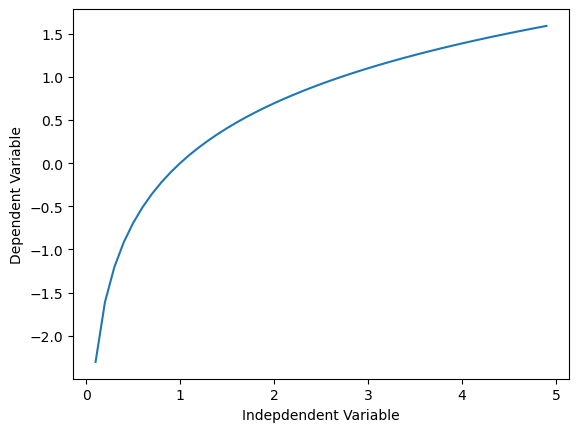

In [4]:
#exponentical model

X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 

plt.ylabel('Dependent Variable')

plt.xlabel('Indepdendent Variable')

plt.show()

#Logarithmic model

X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 

plt.ylabel('Dependent Variable')

plt.xlabel('Indepdendent Variable')

plt.show()

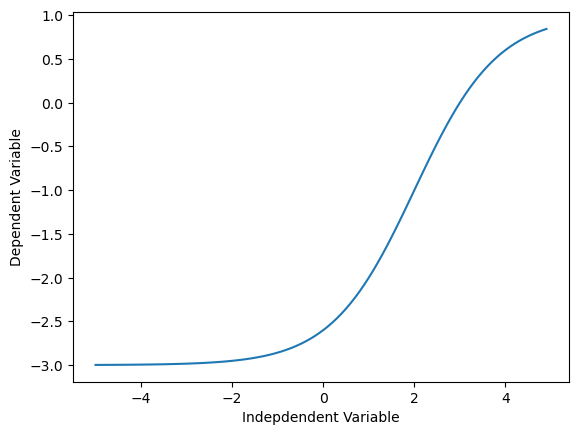

In [5]:
#Sigmoidal/Logistic

X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 

plt.ylabel('Dependent Variable')

plt.xlabel('Indepdendent Variable')

plt.show()


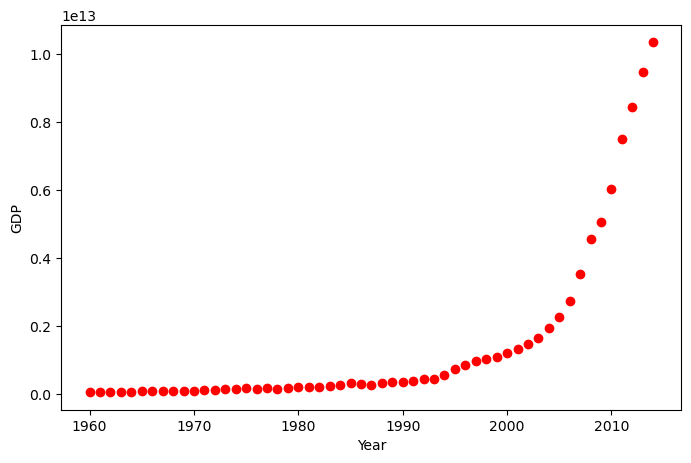

In [6]:
#***Fitting of non linear regression to the given data

#Plotting the data

# Get the data

df = pd.read_csv(r"china_gdp.csv")

df.head()

plt.figure(figsize=(8,5))

x_data, y_data = (df["Year"].values, df["Value"].values)

plt.plot(x_data, y_data, 'ro')

plt.ylabel('GDP')

plt.xlabel('Year')

plt.show()

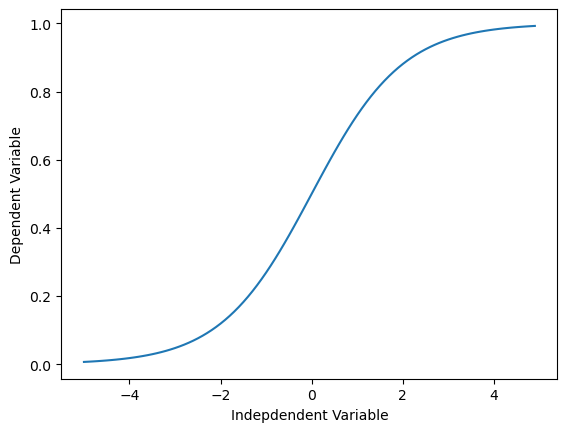

In [7]:
"""From the graph we understand that logistic model is a good approximation"""

# simple logistic model

X = np.arange(-5.0, 5.0, 0.1)

Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 

plt.ylabel('Dependent Variable')

plt.xlabel('Indepdendent Variable')

plt.show()

 beta_1 = 690.451712, beta_2 = 0.997207


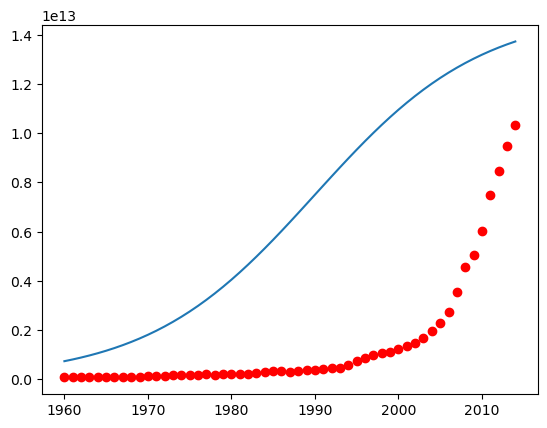

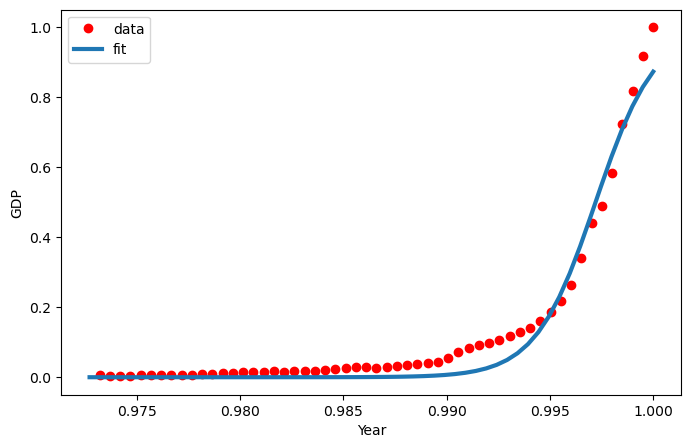

In [8]:
#Define the logistic model

def sigmoid(x, Beta_1, Beta_2):

     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))

     return y

beta_1 = 0.10

beta_2 = 1990.0

#logistic function

Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints

plt.plot(x_data, Y_pred*15000000000000.)

plt.plot(x_data, y_data, 'ro')

# Lets normalize our data

xdata =x_data/max(x_data)

ydata =y_data/max(y_data)

"""we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters"""

from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print the final parameters

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

#Validate

x = np.linspace(1960, 2015, 55)

x = x/max(x)

plt.figure(figsize=(8,5))

y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'ro', label='data')

plt.plot(x,y, linewidth=3.0, label='fit')

plt.legend(loc='best')

plt.ylabel('GDP')

plt.xlabel('Year')

plt.show()

In [9]:
# split data into train/test

msk = np.random.rand(len(df)) < 0.8

train_x = xdata[msk]

test_x = xdata[~msk]

train_y = ydata[msk]

test_y = ydata[~msk]

# build the model using train set

popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set

y_hat = sigmoid(test_x, *popt)

# evaluation

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))

print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))

from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.85
